In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
# Define output folder inside input_folder and create if it doesn't exist
input_folder = r"C:\UM\Project\PulseTest\TVS_21700_HybridPulse_10Deg\filtered_data"
output_folder = os.path.join(input_folder, "output_directory")
os.makedirs(output_folder, exist_ok=True)


In [10]:
def process_csv(file_path, output_dir):
    df = pd.read_csv(file_path)
    
    # Ensure 'Prog Time' is sorted
    df = df.sort_values(by='Prog Time')
    
    # Identify start and end points of pulses
    mask = (df['Current'] >= -1.5) & (df['Current'] <= -0.5)
    
    pulse_start = None
    pulse_ranges = []
    
    for i in range(len(df)):
        if mask.iloc[i] and pulse_start is None:
            pulse_start = df.iloc[i]['Prog Time']  # Start time when current enters range
        elif not mask.iloc[i] and pulse_start is not None:
            pulse_end = df.iloc[i]['Prog Time']  # End time when current exits range
            if pulse_end - pulse_start > 600:  # Check duration condition
                pulse_ranges.append((pulse_start, pulse_end))
            pulse_start = None  # Reset start time
    
    print(f"Identified {len(pulse_ranges)} valid pulses in {file_path}")
    
    if not pulse_ranges:
        print("No valid pulses found.")
        return []
    
    base_filename = os.path.splitext(os.path.basename(file_path))[0]
    file_output_dir = os.path.join(output_dir, base_filename)
    os.makedirs(file_output_dir, exist_ok=True)
    
    extracted_files = []
    
    for i, (start_time, end_time) in enumerate(pulse_ranges):
        extract_start = start_time - 500
        extract_end = start_time + 2400
        
        pulse_df = df[(df['Prog Time'] >= extract_start) & (df['Prog Time'] <= extract_end)].copy()
        
        # Create relative time column
        pulse_df['Relative Time'] = pulse_df['Prog Time'] - extract_start
        
        if pulse_df.empty:
            print(f"Pulse {i+1} has no valid data to save.")
            continue
        
        # Save the extracted data
        output_file = os.path.join(file_output_dir, f"{base_filename}_pulse_{i+1}.csv")
        pulse_df.to_csv(output_file, index=False)
        extracted_files.append(output_file)
        print(f"Saved {output_file}")
    
    return extracted_files

In [11]:
def plot_csv_files(file_paths):
    for file_path in file_paths:
        df = pd.read_csv(file_path)
        if df.empty:
            print(f"Skipping empty file: {file_path}")
            continue
        
        plt.figure(figsize=(10, 5))
        plt.plot(df['Relative Time'], df['Current'], label='Current')
        plt.plot(df['Relative Time'], df['Voltage'], label='Voltage')
        plt.xlabel('Relative Time (s)')
        plt.ylabel('Current (A) / Voltage (V)')
        plt.title(f"Plot for {os.path.basename(file_path)}")
        plt.legend()
        plt.show()

Identified 19 valid pulses in C:\UM\Project\PulseTest\TVS_21700_HybridPulse_10Deg\filtered_data\filtered_processed_57638_TS055886.csv
Saved C:\UM\Project\PulseTest\TVS_21700_HybridPulse_10Deg\filtered_data\output_directory\filtered_processed_57638_TS055886\filtered_processed_57638_TS055886_pulse_1.csv
Saved C:\UM\Project\PulseTest\TVS_21700_HybridPulse_10Deg\filtered_data\output_directory\filtered_processed_57638_TS055886\filtered_processed_57638_TS055886_pulse_2.csv
Saved C:\UM\Project\PulseTest\TVS_21700_HybridPulse_10Deg\filtered_data\output_directory\filtered_processed_57638_TS055886\filtered_processed_57638_TS055886_pulse_3.csv
Saved C:\UM\Project\PulseTest\TVS_21700_HybridPulse_10Deg\filtered_data\output_directory\filtered_processed_57638_TS055886\filtered_processed_57638_TS055886_pulse_4.csv
Saved C:\UM\Project\PulseTest\TVS_21700_HybridPulse_10Deg\filtered_data\output_directory\filtered_processed_57638_TS055886\filtered_processed_57638_TS055886_pulse_5.csv
Saved C:\UM\Project\P

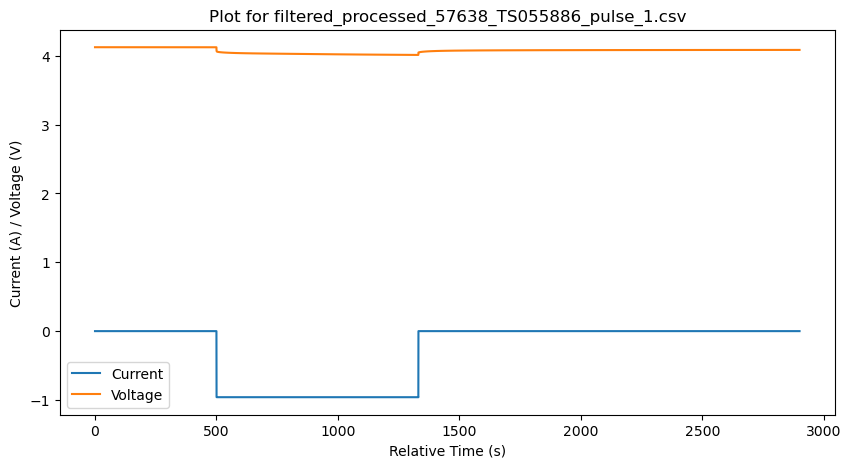

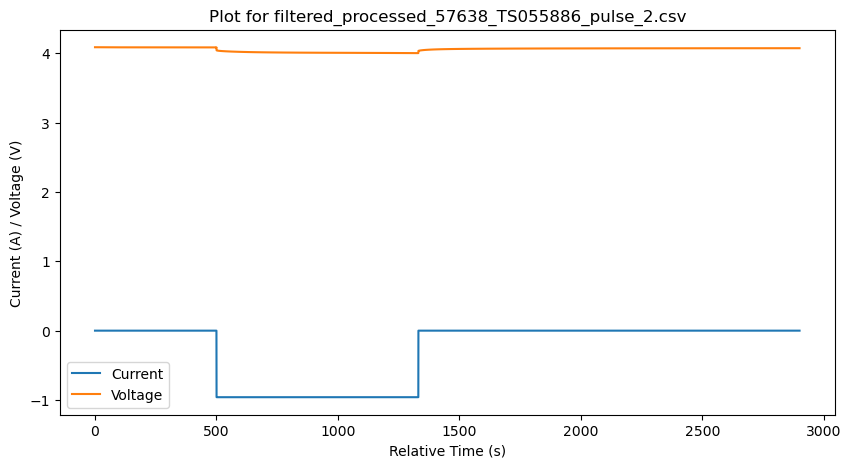

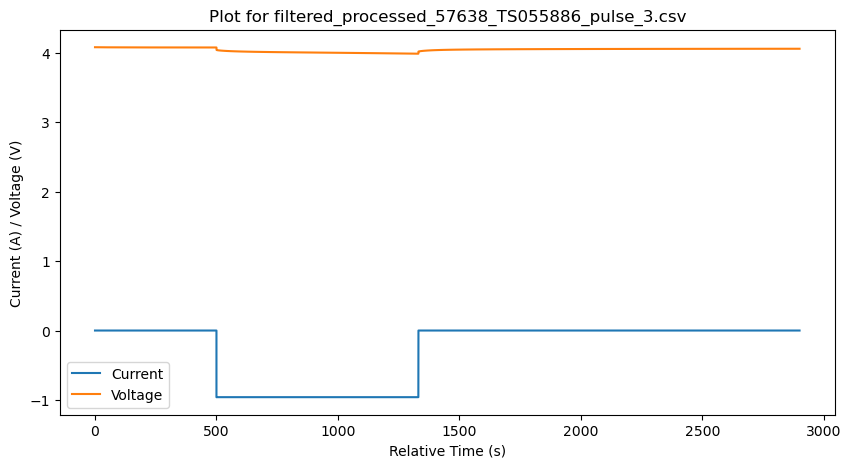

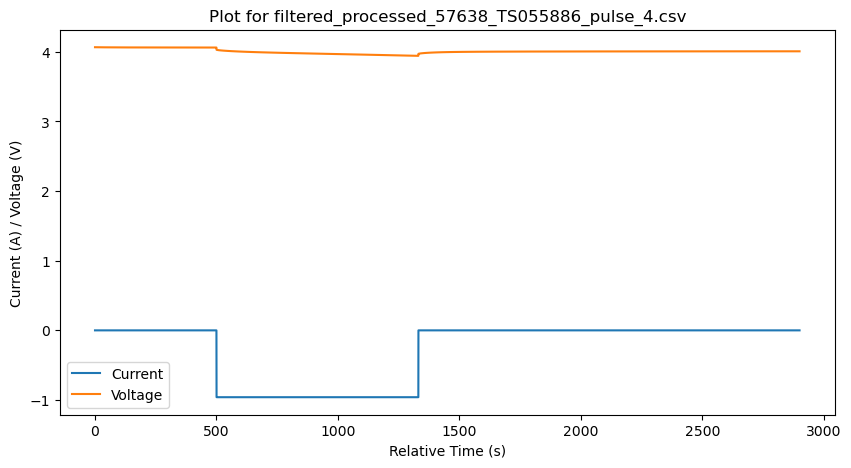

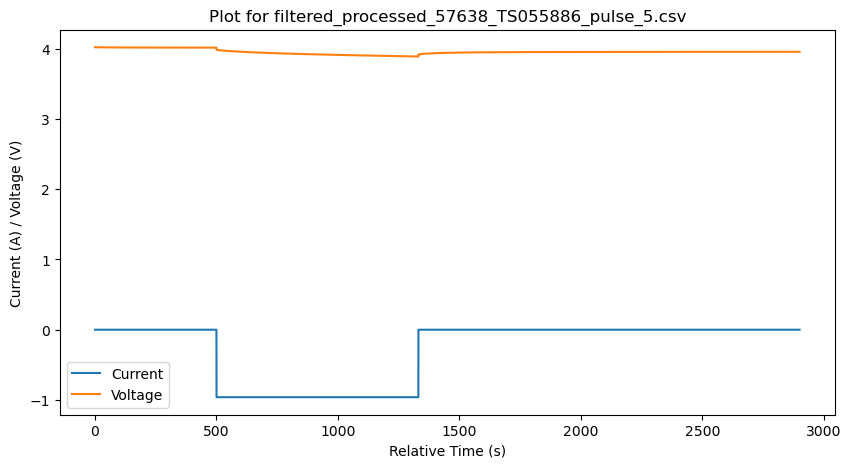

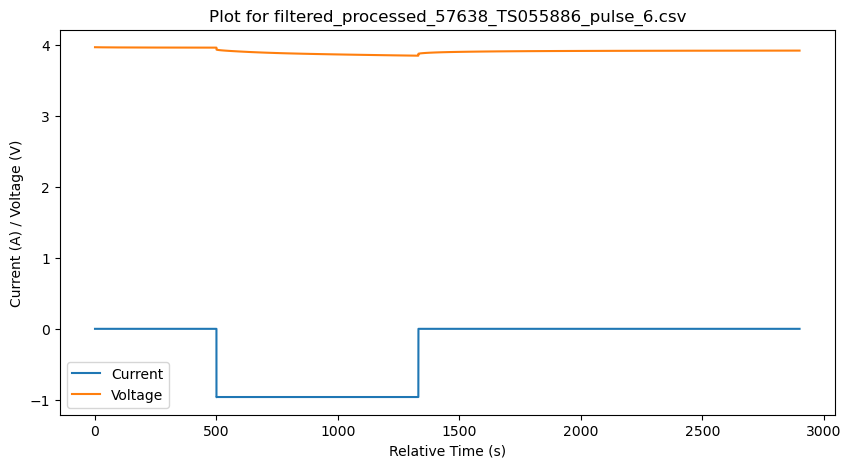

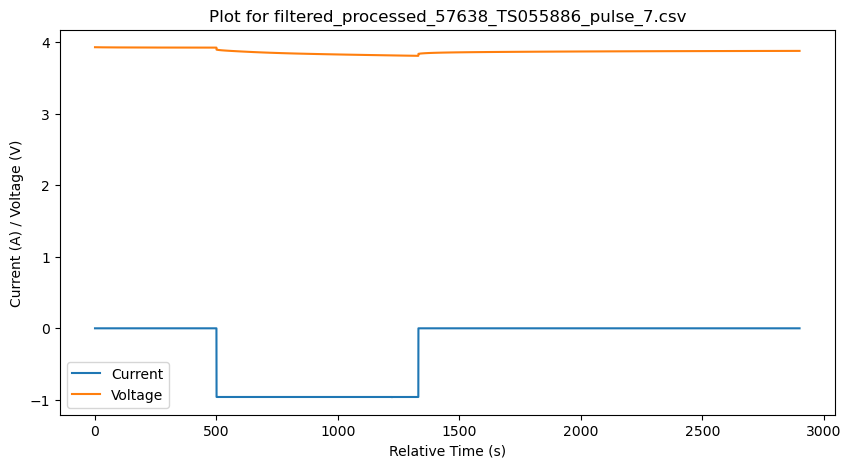

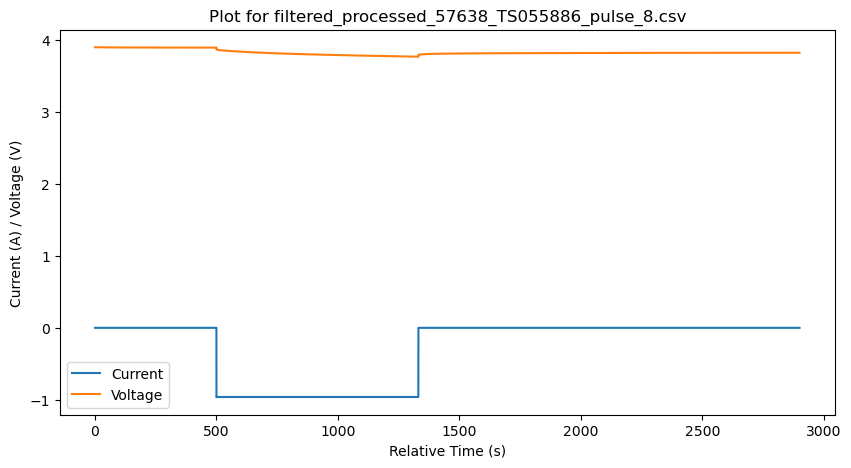

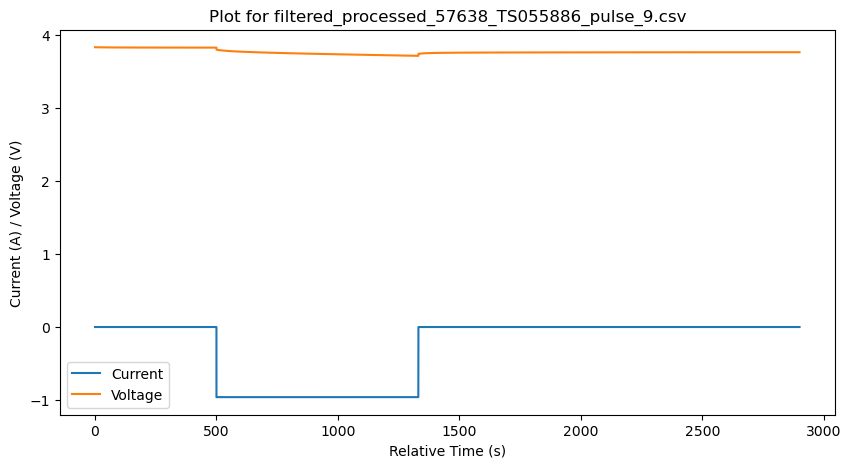

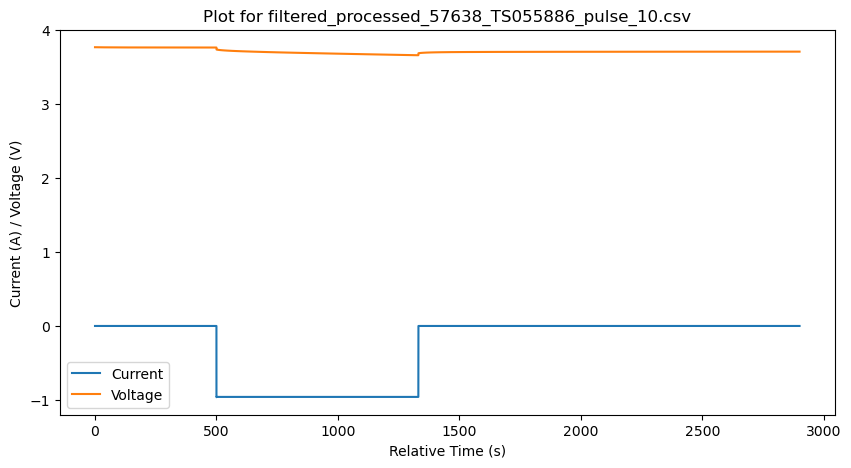

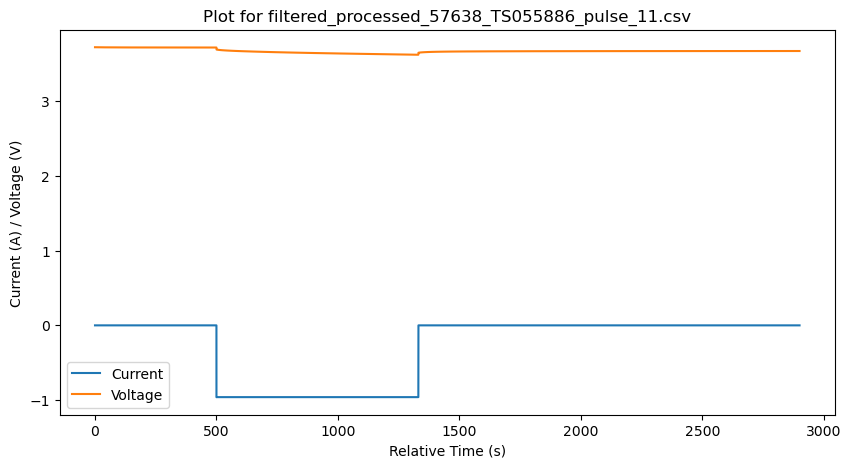

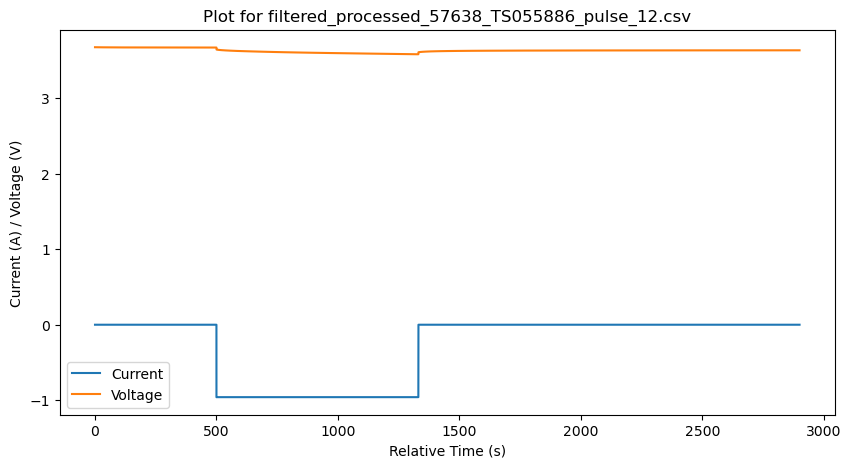

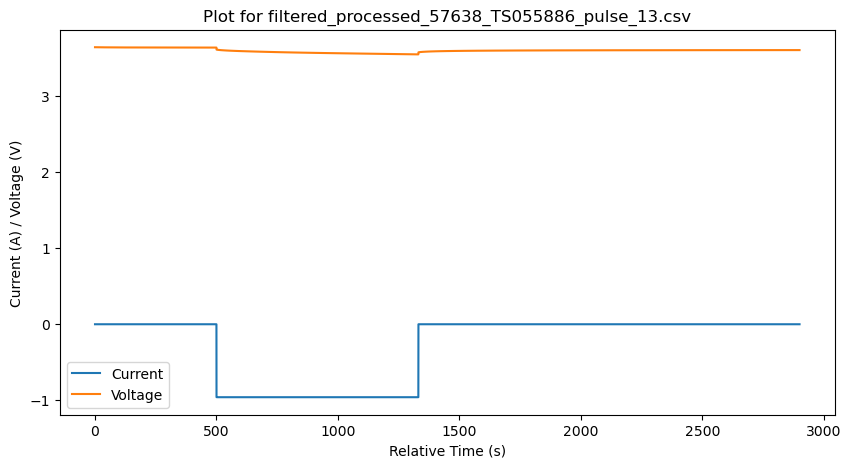

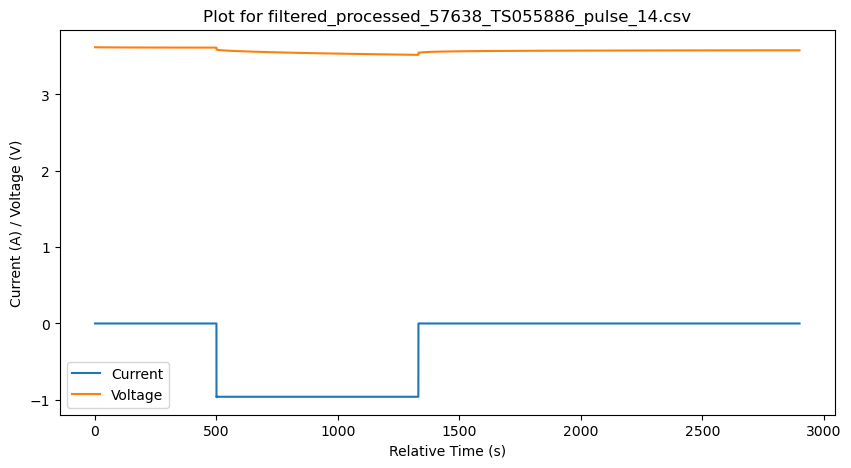

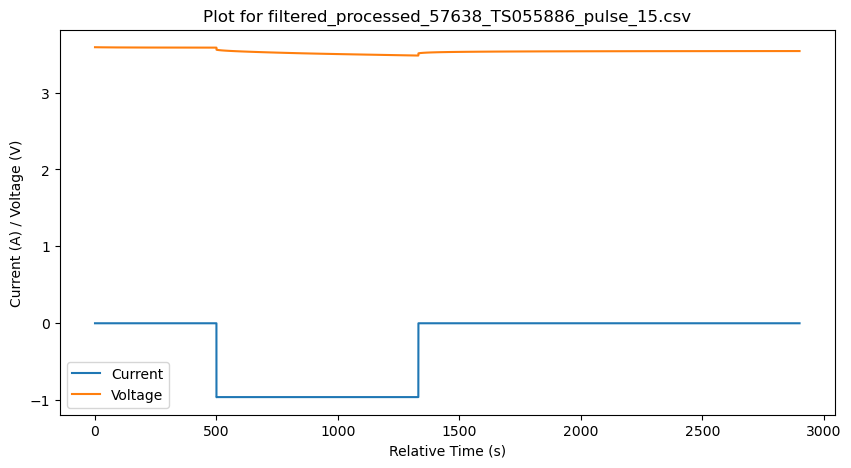

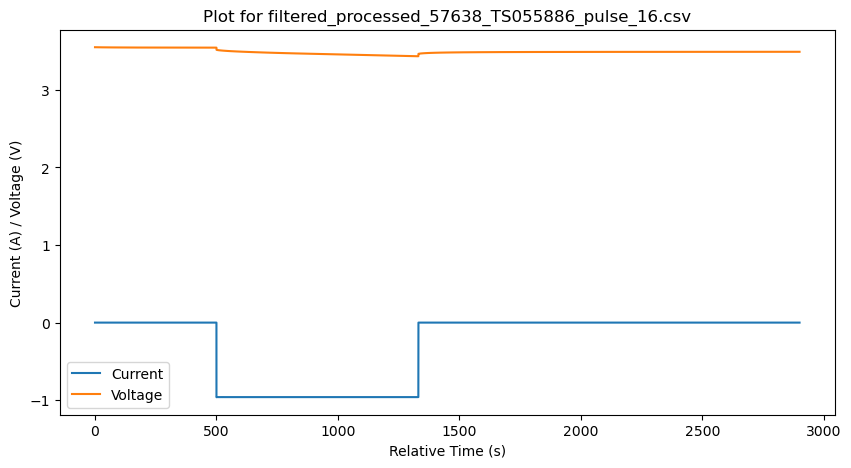

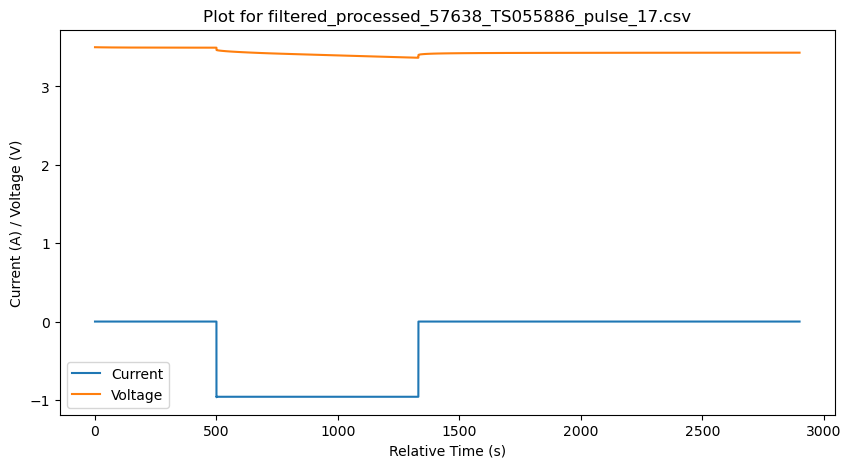

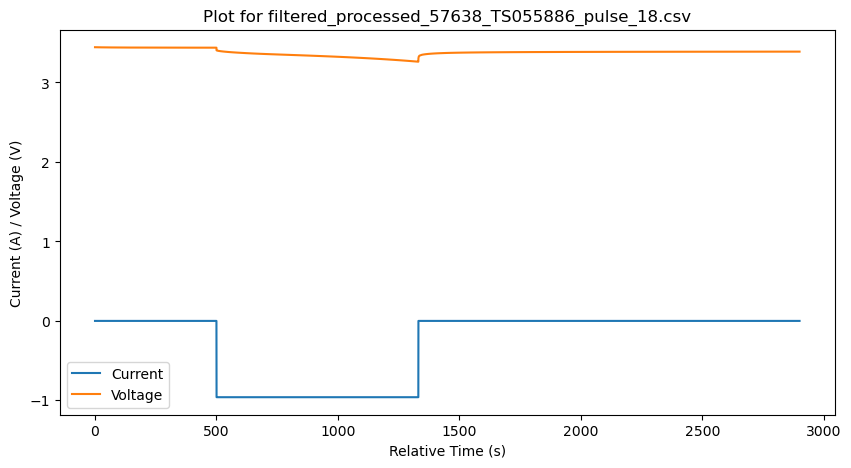

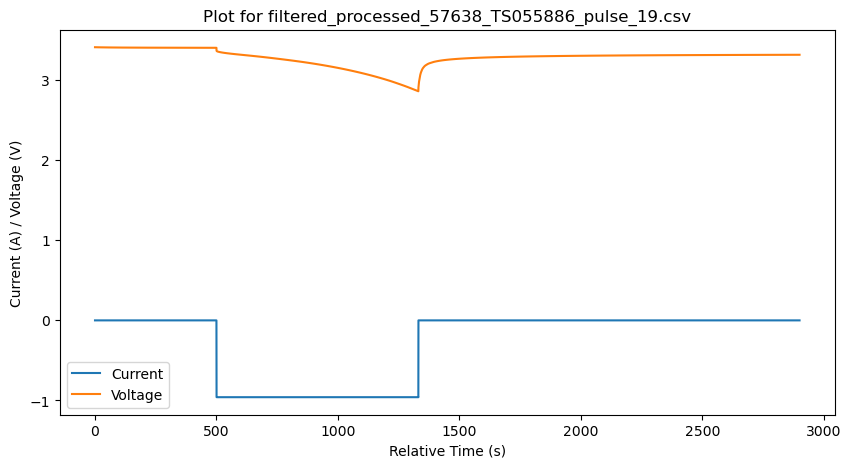

Identified 19 valid pulses in C:\UM\Project\PulseTest\TVS_21700_HybridPulse_10Deg\filtered_data\filtered_processed_57639_TS055887.csv
Saved C:\UM\Project\PulseTest\TVS_21700_HybridPulse_10Deg\filtered_data\output_directory\filtered_processed_57639_TS055887\filtered_processed_57639_TS055887_pulse_1.csv
Saved C:\UM\Project\PulseTest\TVS_21700_HybridPulse_10Deg\filtered_data\output_directory\filtered_processed_57639_TS055887\filtered_processed_57639_TS055887_pulse_2.csv
Saved C:\UM\Project\PulseTest\TVS_21700_HybridPulse_10Deg\filtered_data\output_directory\filtered_processed_57639_TS055887\filtered_processed_57639_TS055887_pulse_3.csv
Saved C:\UM\Project\PulseTest\TVS_21700_HybridPulse_10Deg\filtered_data\output_directory\filtered_processed_57639_TS055887\filtered_processed_57639_TS055887_pulse_4.csv
Saved C:\UM\Project\PulseTest\TVS_21700_HybridPulse_10Deg\filtered_data\output_directory\filtered_processed_57639_TS055887\filtered_processed_57639_TS055887_pulse_5.csv
Saved C:\UM\Project\P

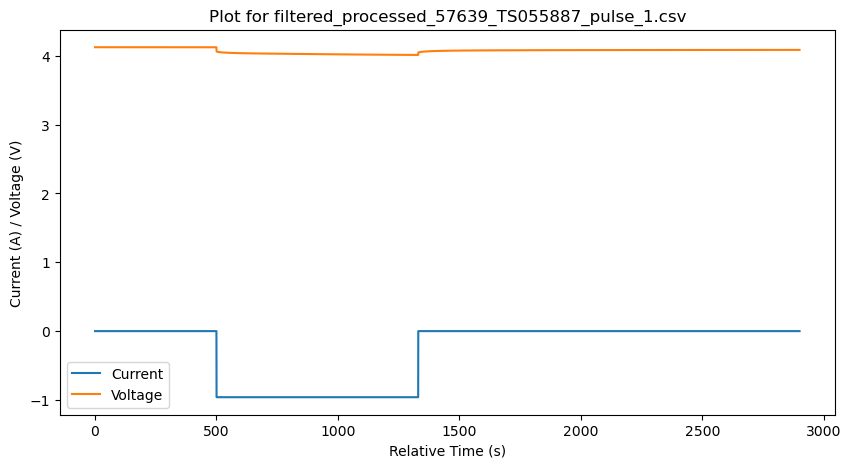

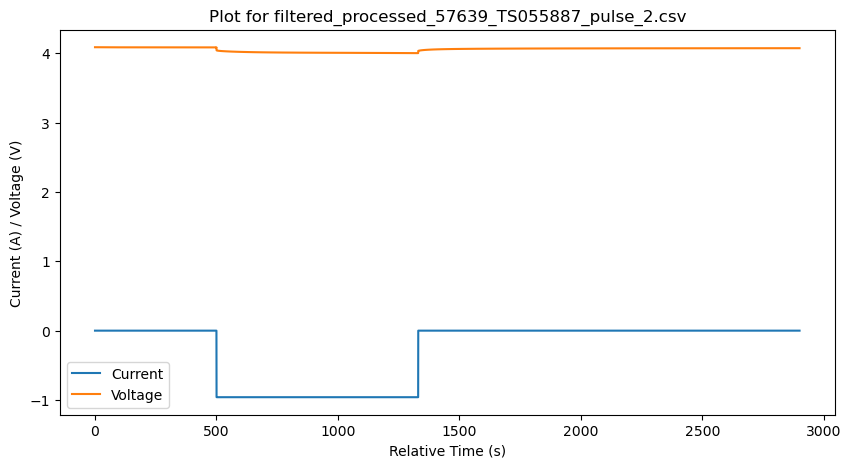

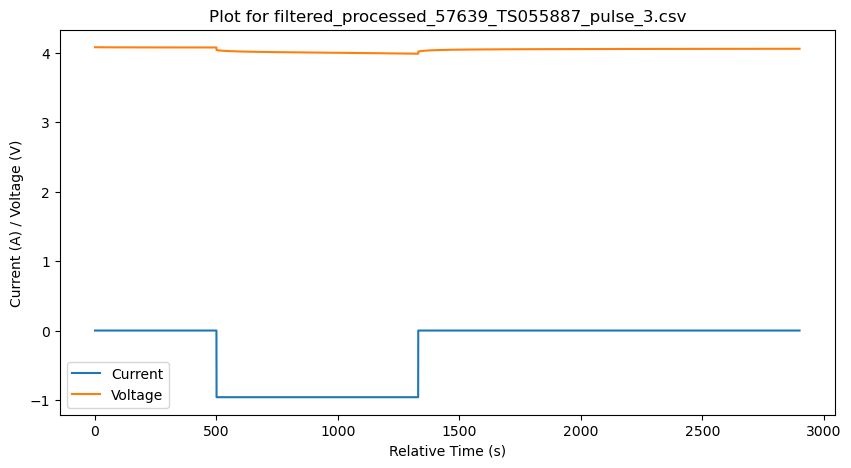

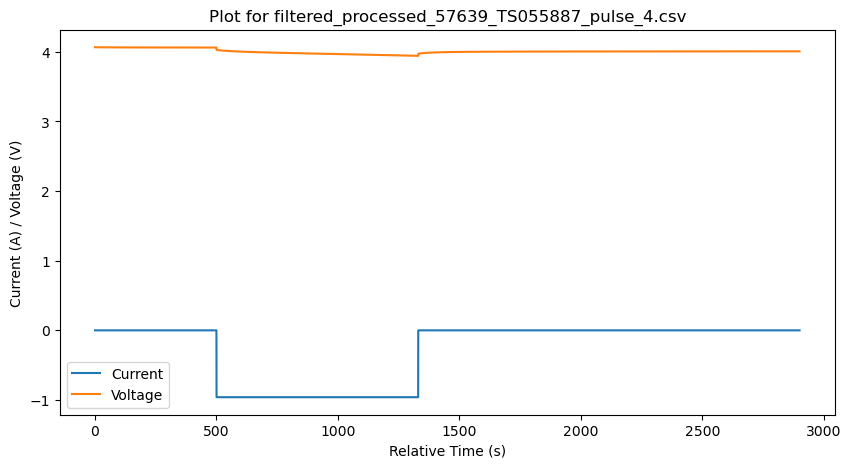

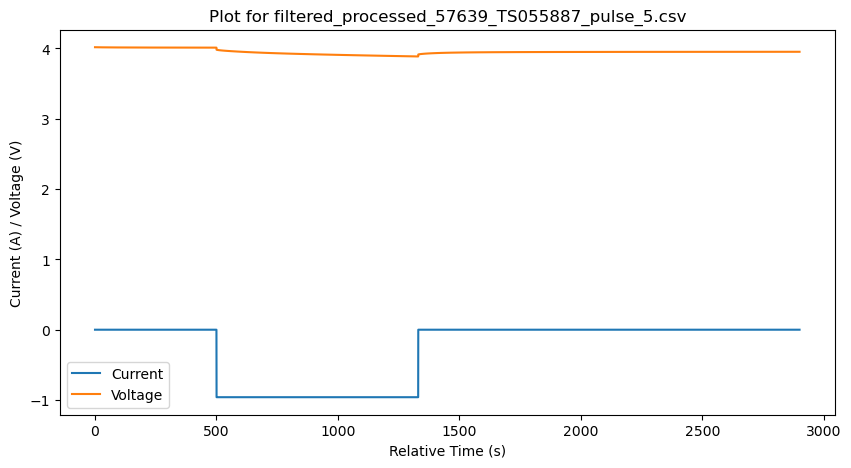

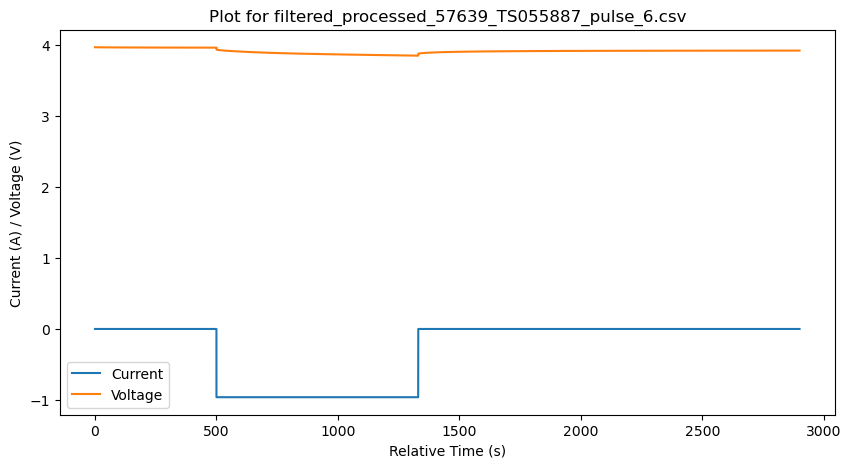

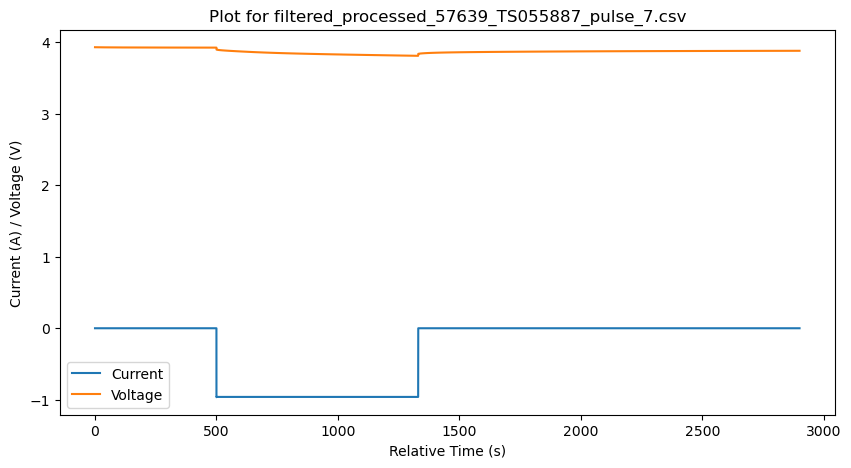

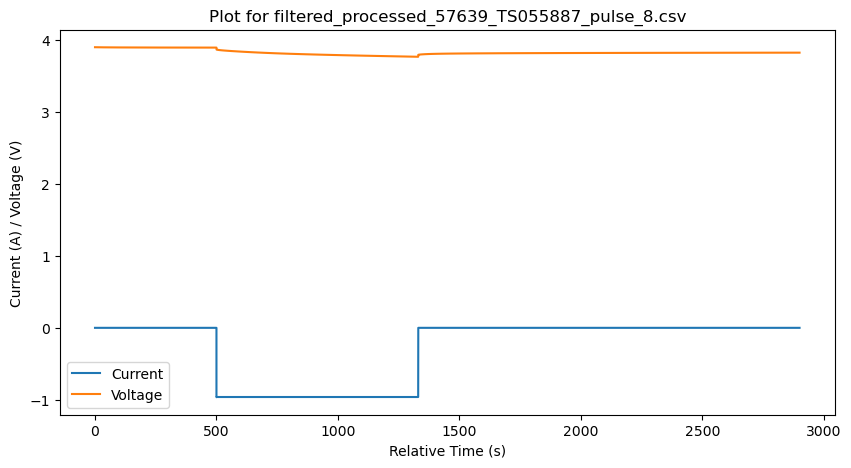

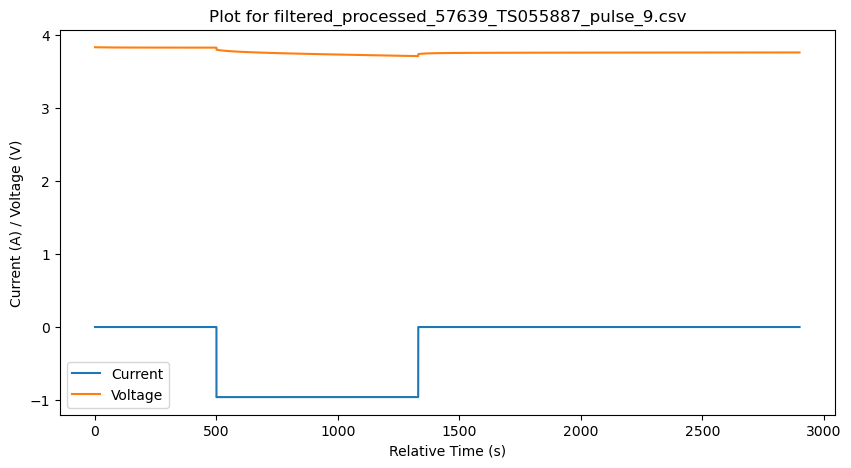

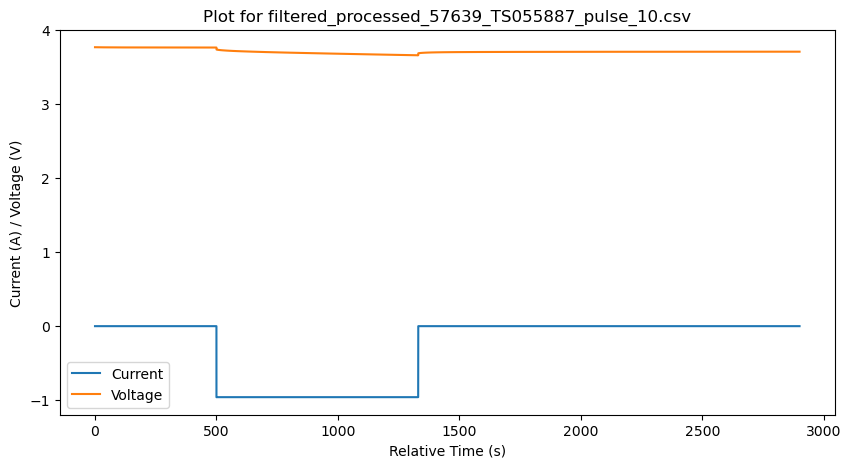

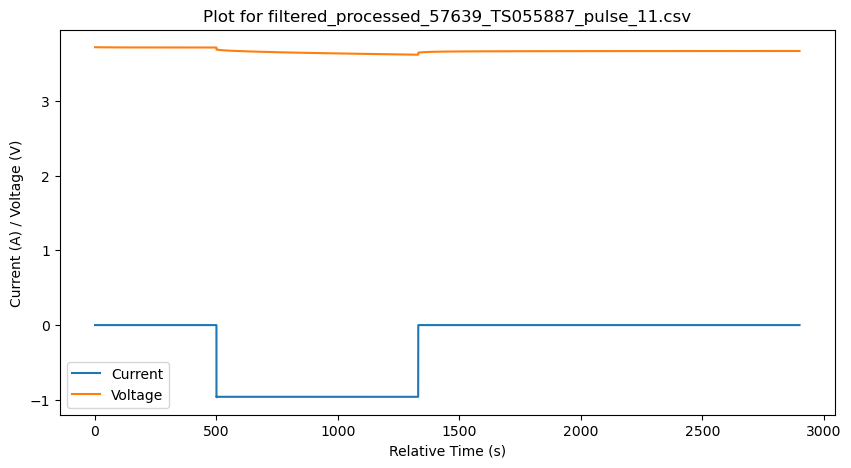

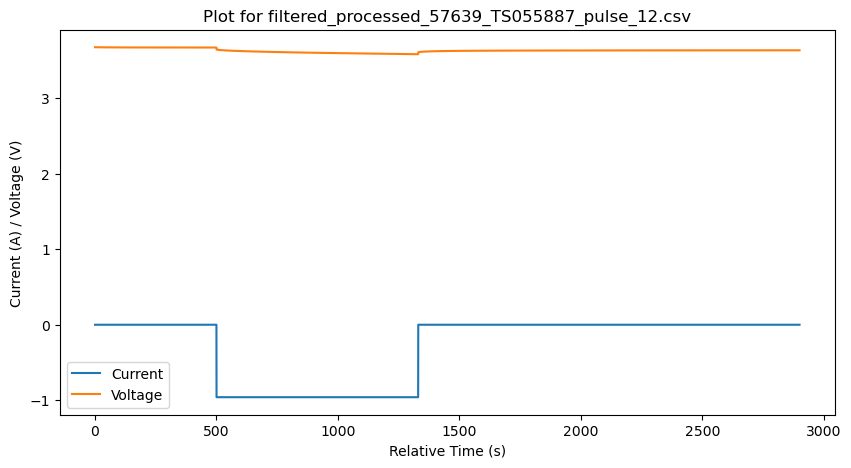

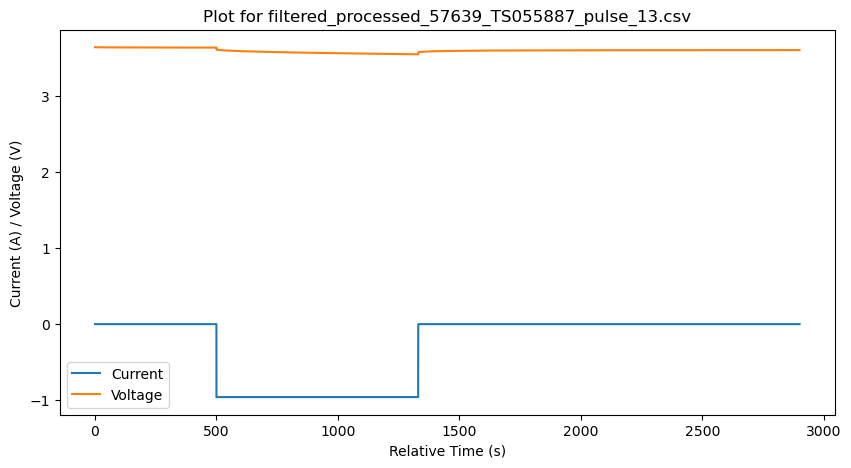

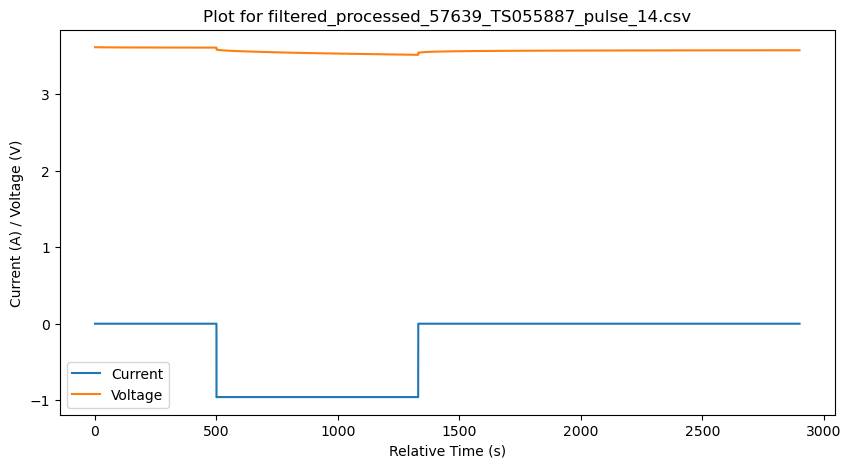

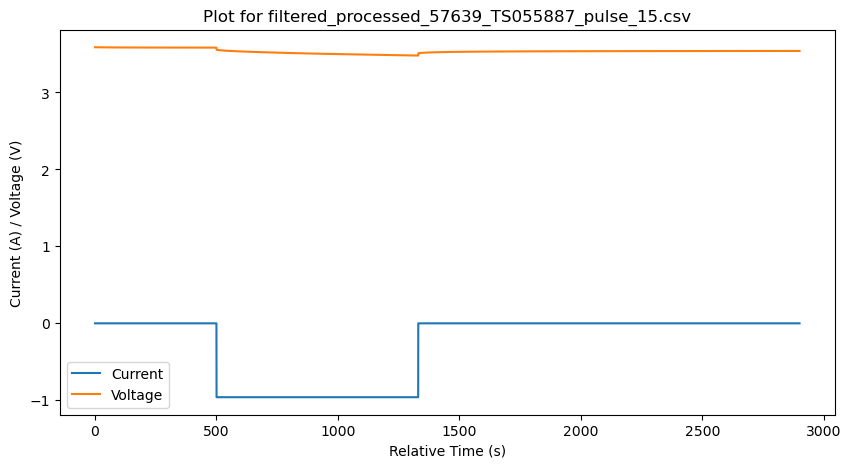

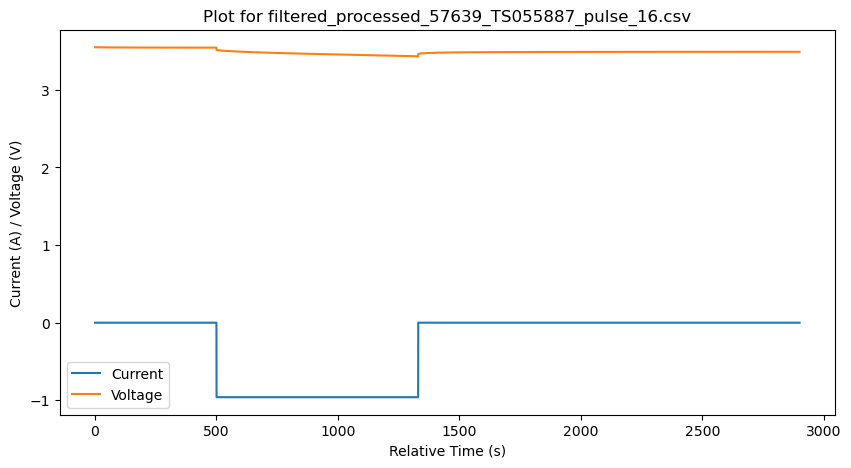

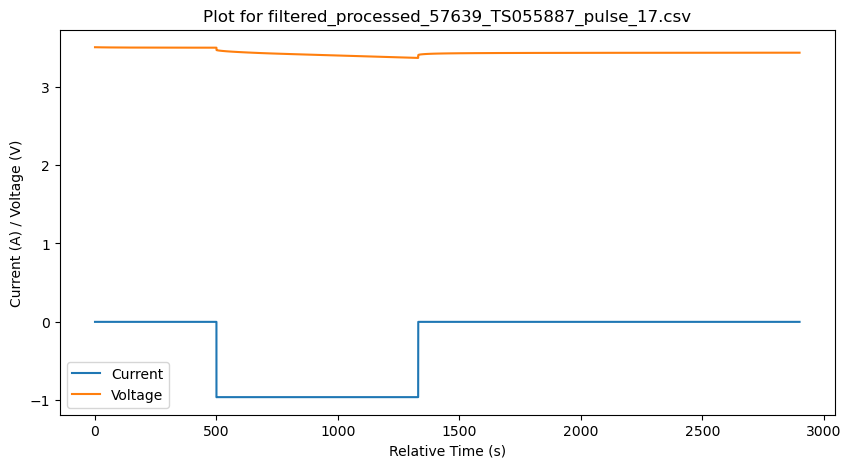

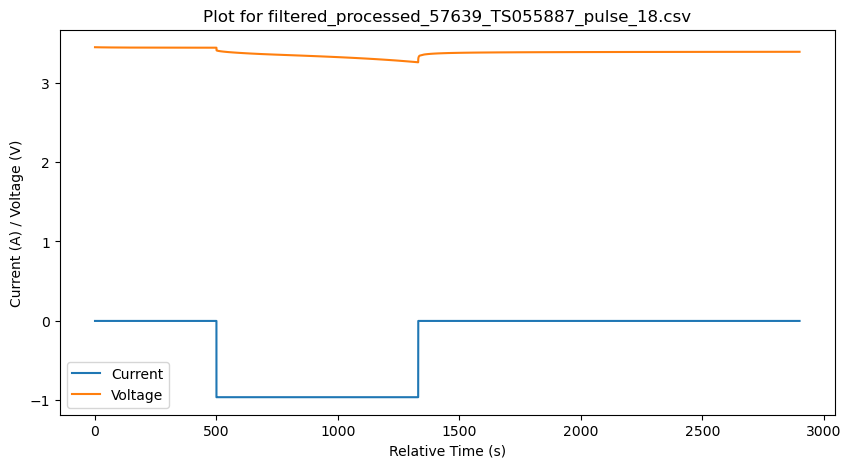

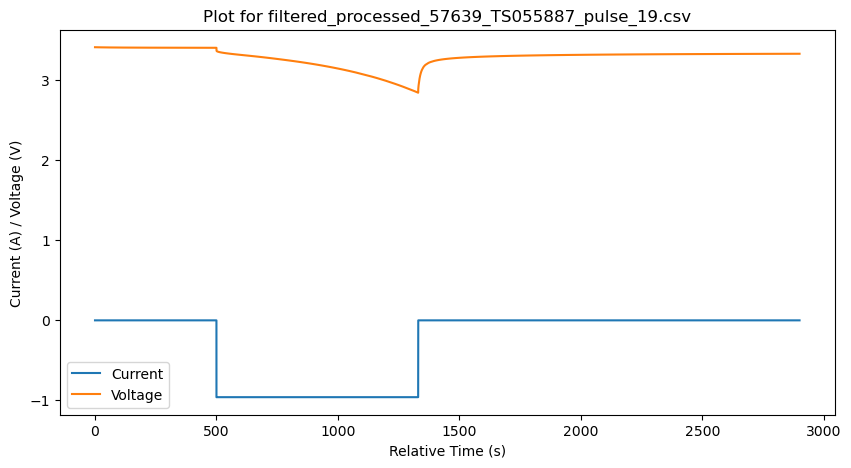

Identified 19 valid pulses in C:\UM\Project\PulseTest\TVS_21700_HybridPulse_10Deg\filtered_data\filtered_processed_57640_TS055888.csv
Saved C:\UM\Project\PulseTest\TVS_21700_HybridPulse_10Deg\filtered_data\output_directory\filtered_processed_57640_TS055888\filtered_processed_57640_TS055888_pulse_1.csv
Saved C:\UM\Project\PulseTest\TVS_21700_HybridPulse_10Deg\filtered_data\output_directory\filtered_processed_57640_TS055888\filtered_processed_57640_TS055888_pulse_2.csv
Saved C:\UM\Project\PulseTest\TVS_21700_HybridPulse_10Deg\filtered_data\output_directory\filtered_processed_57640_TS055888\filtered_processed_57640_TS055888_pulse_3.csv
Saved C:\UM\Project\PulseTest\TVS_21700_HybridPulse_10Deg\filtered_data\output_directory\filtered_processed_57640_TS055888\filtered_processed_57640_TS055888_pulse_4.csv
Saved C:\UM\Project\PulseTest\TVS_21700_HybridPulse_10Deg\filtered_data\output_directory\filtered_processed_57640_TS055888\filtered_processed_57640_TS055888_pulse_5.csv
Saved C:\UM\Project\P

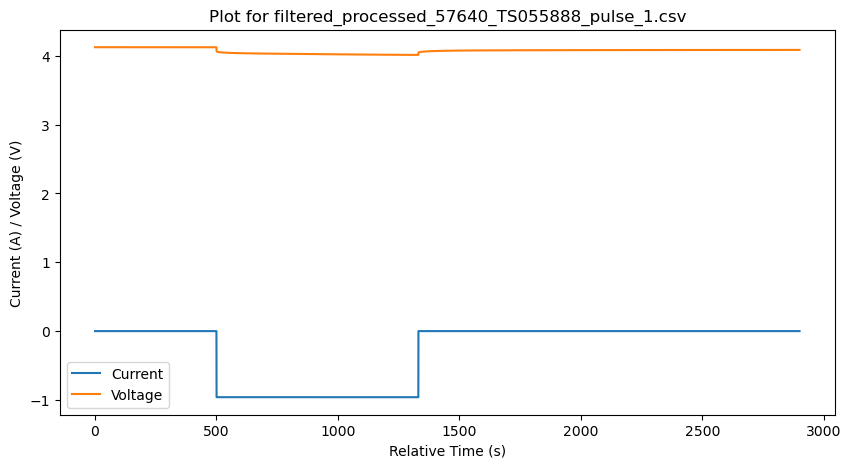

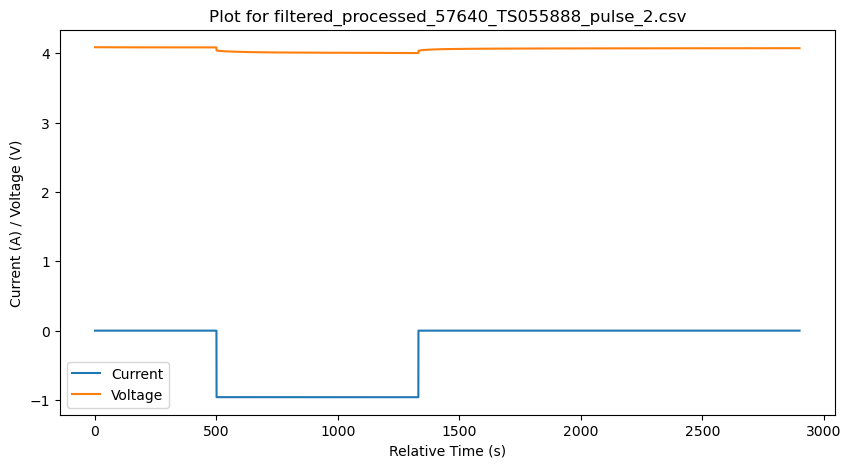

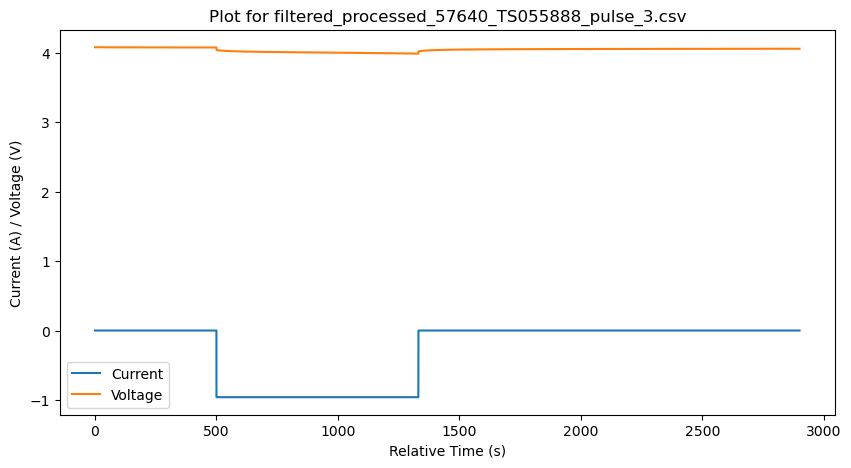

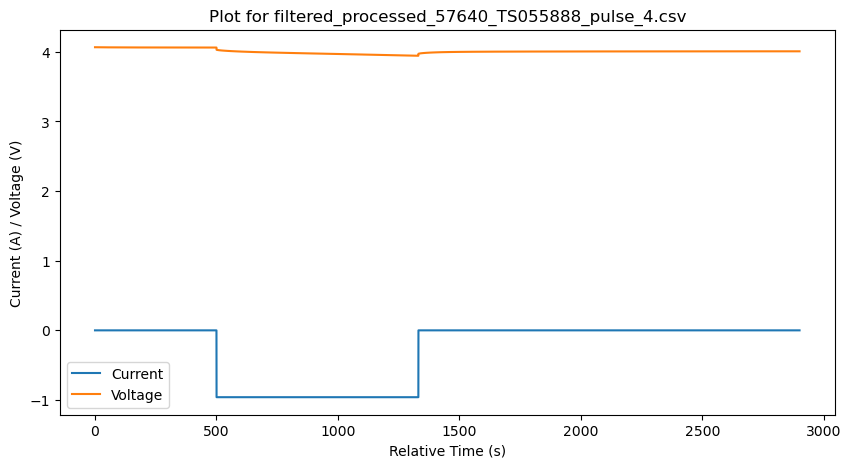

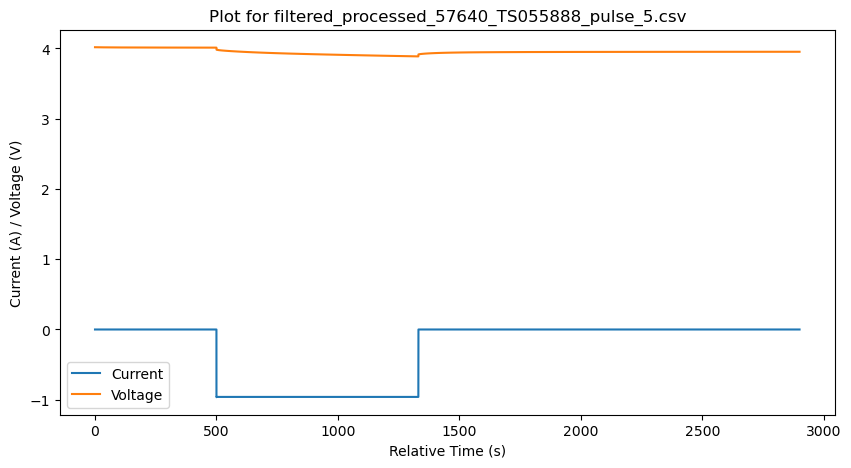

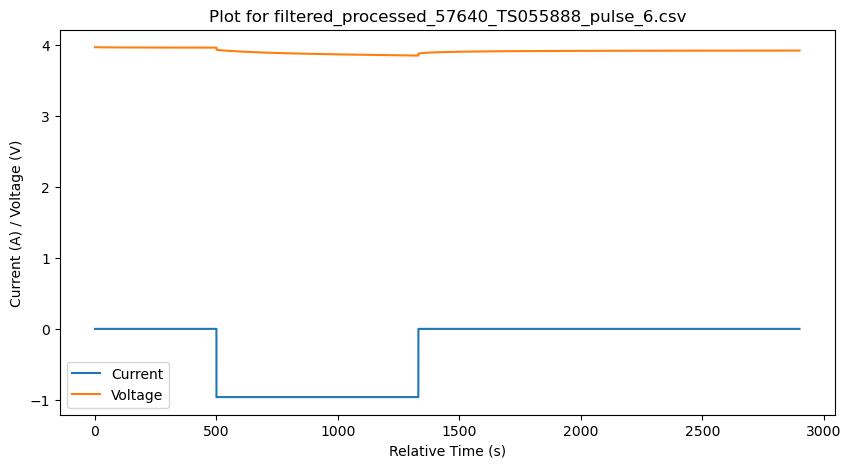

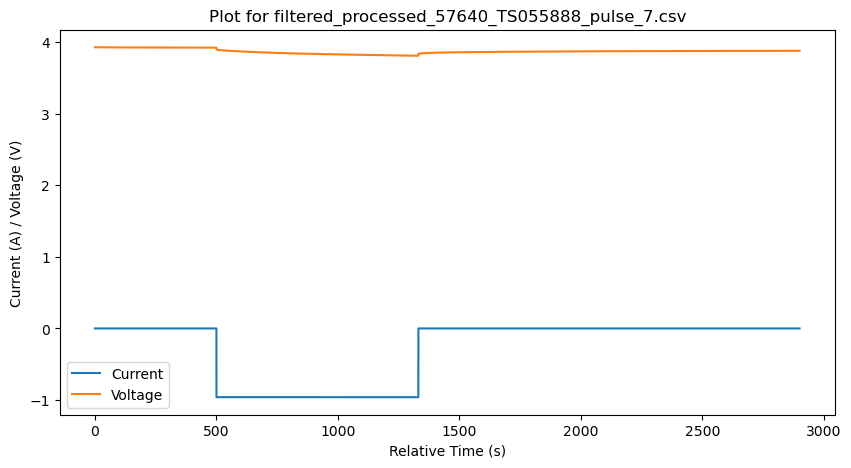

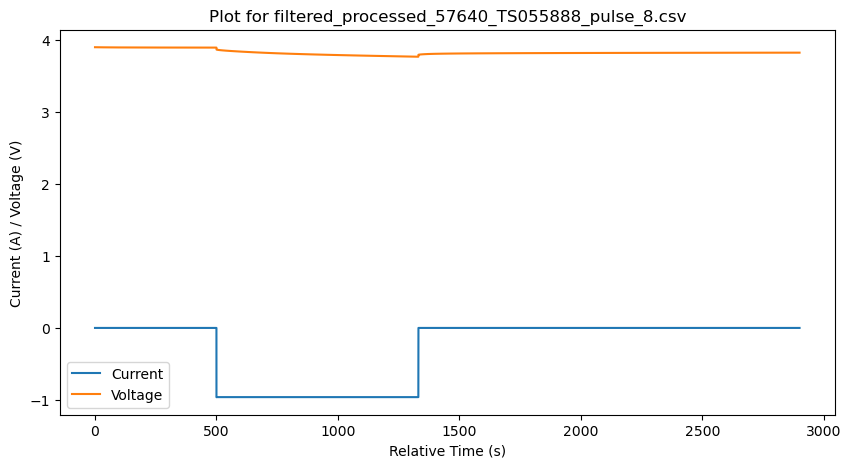

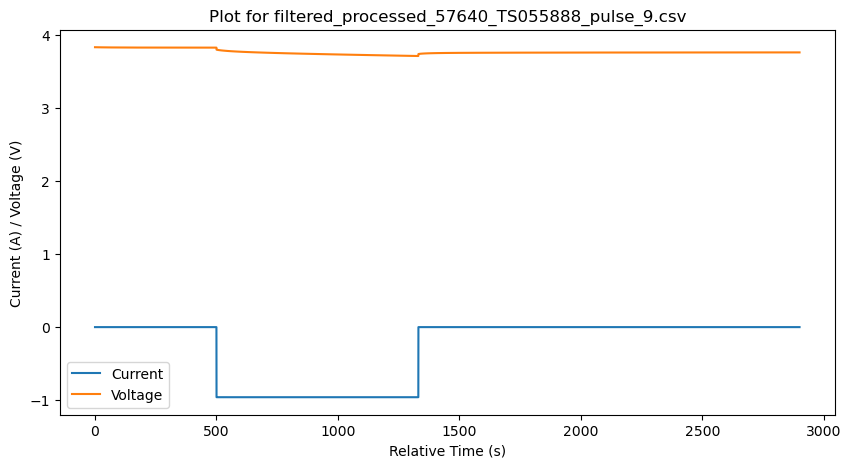

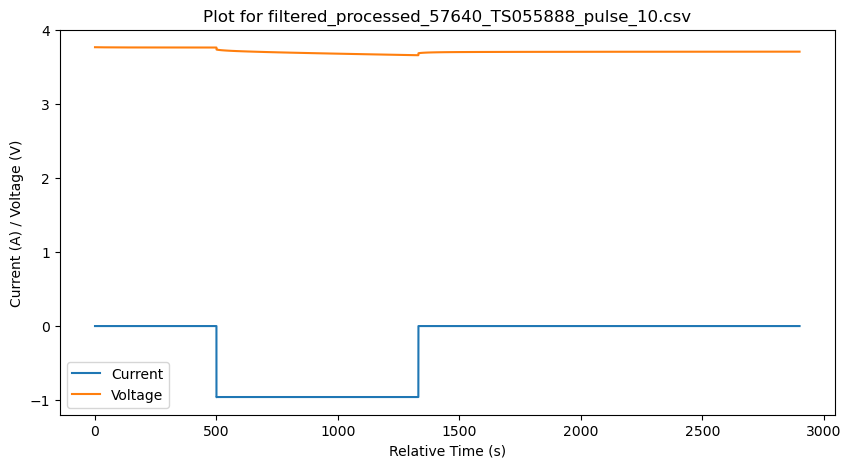

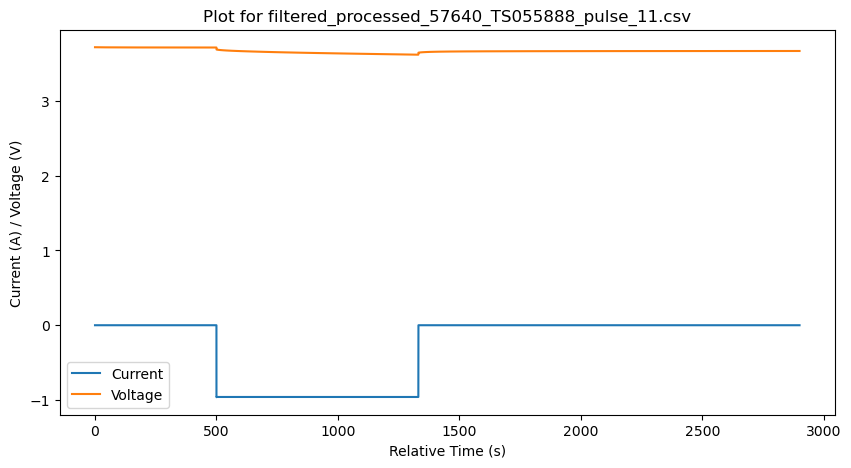

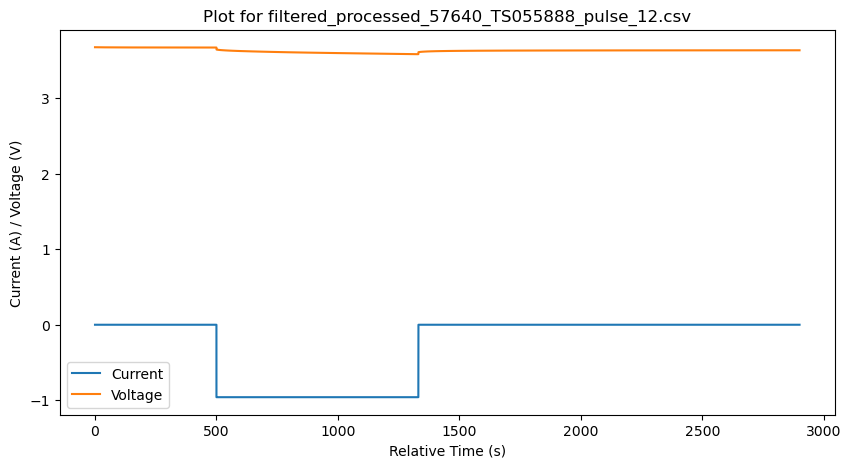

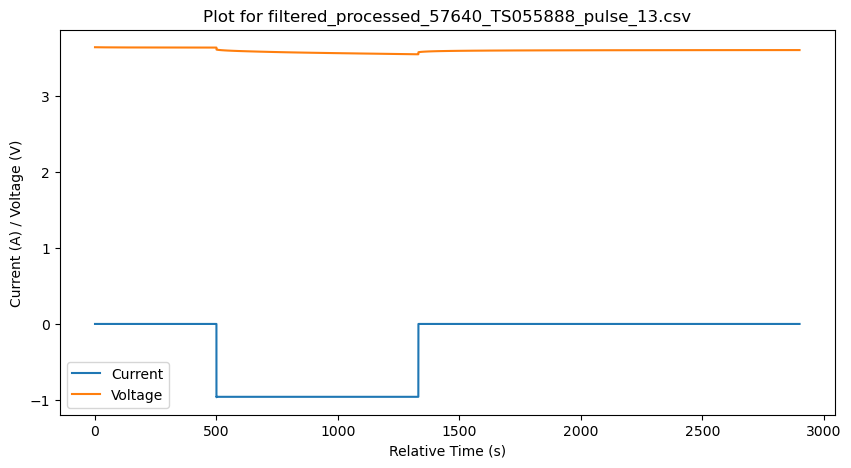

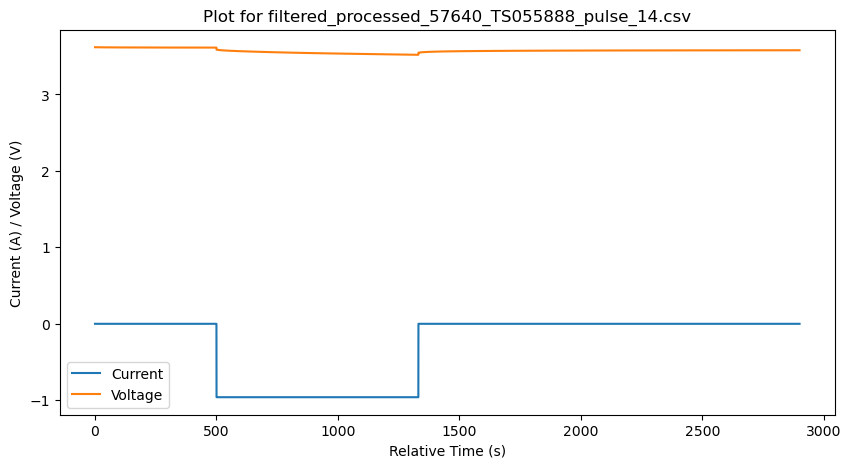

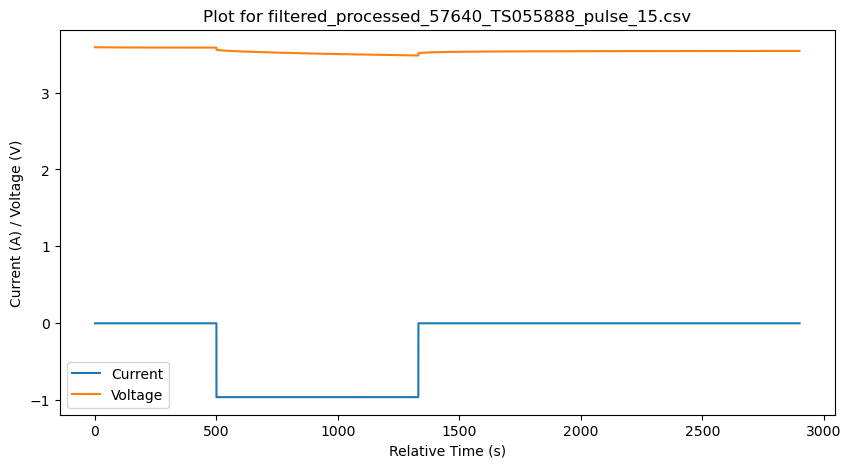

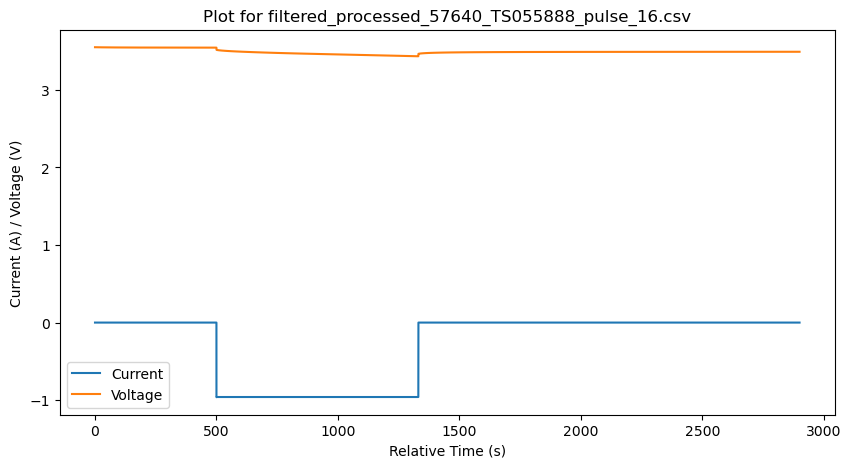

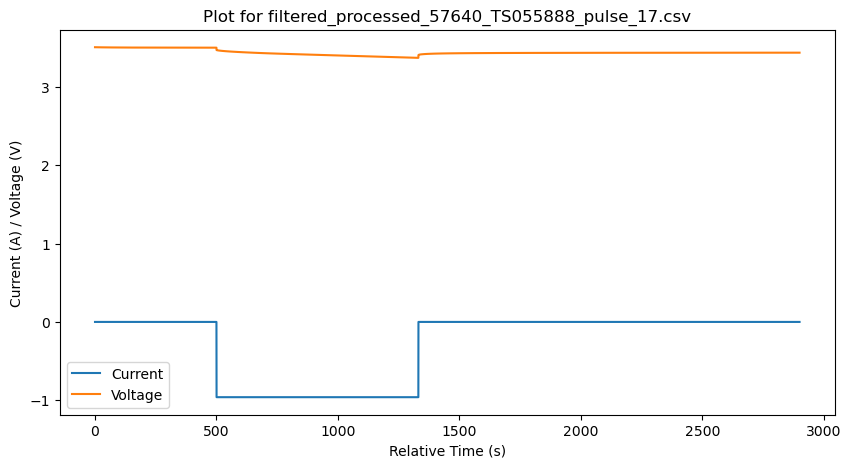

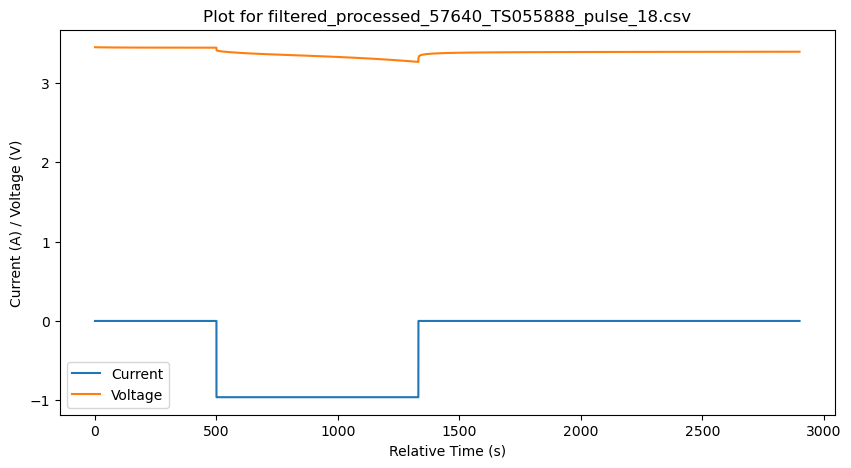

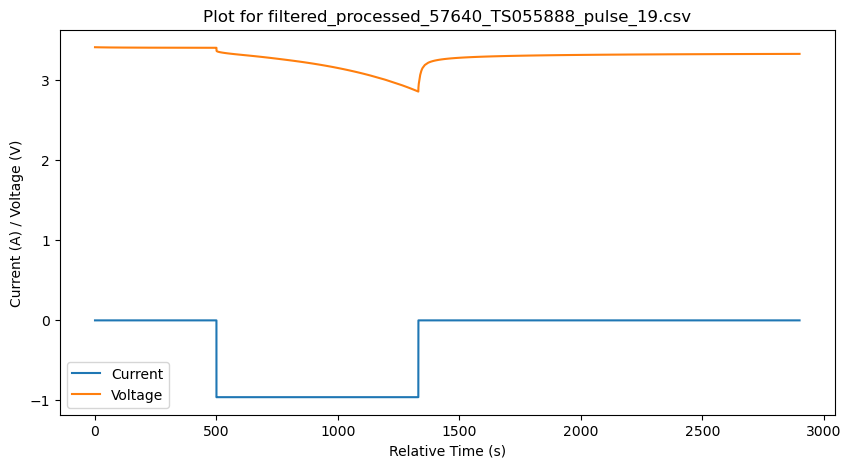

In [12]:
for file in os.listdir(input_folder):
    if file.endswith(".csv"):
        file_path = os.path.join(input_folder, file)
        extracted_files = process_csv(file_path, output_folder)
        plot_csv_files(extracted_files)